# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

"Based on the data provided in 2017 and 2018, identify areas to invest in to improve SAT participation rates"

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Importing the data and displaying the shape
sat_score17=pd.read_csv("./data/sat_2017.csv")
act_score17=pd.read_csv("./data/act_2017.csv")
print(sat_score17.shape)
print(act_score17.shape)


(51, 5)
(52, 7)


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Printing first 10 rows of 2017 SAT scores
print(sat_score17.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

In [4]:
#Printing first 10 rows of 2017 SAT scores
print(act_score17.head(10))

                  State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2  


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

*From the data provided, without any in depth analysis, there seems to be an emphasis on taking either the ACT or SAT alone, as there is contrasting participation rates for each test in a state. For example, the participation of SAT in Delaware is a full 100%, but it is a low 18% participation rate for ACT. Colorado shows the exact opposite, where it has a high participation rate of 100% in ACT, but a low 11% in SAT.*

*There is also a trend in which if the state has a low participation rate, the more likely that the result will be higher, regardless whether it is ACT or SAT.*

*Overall, ACT has a higher participation rate amongst all the states compared to SAT, as SAT has multiple low scoring participation rates where they have participation rates of less than 5%, whereas ACT only has one state with a low participation rate of 8% (Maine).*

#### 4a. Does the data look complete? 

Answer:

*The data looks complete but requires a little bit of cleaning as there are 'noises' in the data and incorrect data. (Eg. the composite score for Wyoming's ACT has an "x" after the score.)*

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

Minimum and maximum scores can be seen in the second row of the descriptive table for SAT  and ACT below.

There seems to be certain outliers within the data, for example, having a score of 52 when the 25% and 75% intervals lie between 522 and 599.

In [5]:
print("Descriptive statistics for SAT score")
sat_score17.describe()

Descriptive statistics for SAT score


,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
print("Descriptive statistics for SAT score")
act_score17.describe()

Descriptive statistics for SAT score


,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
#replacing the incorrect values with the correct values from ACT and SAT's site provided above.
act_score17.replace(to_replace=['20.2x',2.3],value=[20.2,23.2],inplace=True)
sat_score17.replace(to_replace=52,value=524,inplace=True)

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
#Data types for ACT
act_score17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [9]:
#Data types for SAT
sat_score17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

*For both dataframes, both of the partcipation columns consist of object type data instead of integers or floats, and for the ACT dataframe only, the Composite column consists of objects instead of float64.*


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
#creation of a function to convert the percentage values to integers and to remove the '%'.
def perc_to_int(df,col):
    def data_perc(perc):
        return int(perc.replace("%",""))
    df[col]=df[col].apply(data_perc)
    return df

In [11]:
#applying the function to the participation column for SAT 17
perc_to_int(sat_score17,'Participation')
sat_score17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [12]:
#applying the function to the participation column for ACT 17
perc_to_int(act_score17,'Participation').head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#creation of a function to convert data to float
def dat_to_flt(df,col):
    def data_perc(perc):
        return float(perc)
    df[col]=df[col].apply(data_perc)
    return df

In [14]:
#application of the float converter function on ACT 17
dat_to_flt(act_score17,'Composite').head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


- Finish your data modifications by making sure the columns are now typed appropriately.

In [15]:
#code
act_score17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [16]:
sat_score17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


- Display the data types again to confirm they are correct.

In [17]:
#data type info for both SAT and ACT data
print(sat_score17.info())
print(act_score17.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB
None


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
#renaming of columns for SAT
sat_score17.rename(columns={'State':'state','Participation':'sat17_part','Evidence-Based Reading and Writing':'sat17_read','Math':'sat17_math','Total':'sat17_total'},inplace=True)
sat_score17.head(3)

,state,sat17_part,sat17_read,sat17_math,sat17_total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116


In [19]:
#renaming of columns for ACT
act_score17.rename(columns={'State':'state','Participation':'act17_part','English':'act17_eng','Math':'act17_math','Reading':'act17_read','Science':'act17_sci','Composite':'act17_comp'},inplace=True)
act_score17.head(4)

,state,act17_part,act17_eng,act17_math,act17_read,act17_sci,act17_comp
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


| Column Name | Dataset (Test & Year)            | Type  | Description                                                  |
| ----------- | -------------------------------- | ----- | ------------------------------------------------------------ |
| State       | SAT 2017 & 2018, ACT 2017 & 2018 | STR   | Name of the State                                            |
| act17_part  | ACT 2017                         | INT   | Participation rate of students  (in percentage) from the State for the 2017 ACT |
| act17_eng   | ACT 2017                         | FLOAT | Mean score for the English test for the State                |
| act17_math  | ACT 2017                         | FLOAT | Mean score for the Math test for the State                   |
| act17_read  | ACT 2017                         | FLOAT | Mean score for the Reading test for the State                |
| act17_sci   | ACT 2017                         | FLOAT | Mean score for the Science test for the State                |
| act17_comp  | ACT 2017                         | FLOAT | Mean composite score for the State in all the tests (English, Math, Reading & Science) |
| sat17_part  | SAT 2017                         | INT   | Participation rate of students  (in percentage) from the State for the 2017 SAT |
| sat17_read  | SAT 2017                         | INT   | Mean score for the Evidence-Based Reading and Writing test for the State |
| sat17_math  | SAT 2017                         | INT   | Mean score for the Math test for the State                   |
| sat17_total | SAT 2017                         | INT   | Mean total score for the state in all SAT tests (Evidence-Based Reading and Writing & Math) |
| act17_part  | ACT 2018                         | INT   | Participation rate of students  (in percentage) from the State for the 2018 ACT |
| act17_eng   | ACT 2018                         | FLOAT | Mean score for the English test for the State                |
| act17_math  | ACT 2018                         | FLOAT | Mean score for the Math test for the State                   |
| act17_read  | ACT 2018                         | FLOAT | Mean score for the Reading test for the State                |
| act17_sci   | ACT 2018                         | FLOAT | Mean score for the Science test for the State                |
| act17_comp  | ACT 2018                         | FLOAT | Mean composite score for the State in all the tests (English, Math, Reading & Science) |
| sat17_part  | SAT 2018                         | INT   | Participation rate of students  (in percentage) from the State for the 2018 SAT |
| sat17_read  | SAT 2018                         | INT   | Mean score for the Evidence-Based Reading and Writing test for the State |
| sat17_math  | SAT 2018                         | INT   | Mean score for the Math test for the State                   |
| sat17_total | SAT 2018                         | INT   | Mean total score for the state in all SAT tests (Evidence-Based Reading and Writing & Math) |





#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [20]:
#removed national from ACT dataframe
act_score17=act_score17[1:]

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
#merging SAT and ACT 2017 data.
state_scores17=pd.merge(act_score17,sat_score17,how='left')
state_scores17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
state          51 non-null object
act17_part     51 non-null int64
act17_eng      51 non-null float64
act17_math     51 non-null float64
act17_read     51 non-null float64
act17_sci      51 non-null float64
act17_comp     51 non-null float64
sat17_part     51 non-null int64
sat17_read     51 non-null int64
sat17_math     51 non-null int64
sat17_total    51 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [22]:
#saving data file.
state_scores17.to_csv('data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [23]:
#importing 2018 data for ACT and SAT and checking the shape of each.
sat_score18=pd.read_csv("./data/sat_2018.csv")
act_score18=pd.read_csv("./data/act_2018_updated.csv")
print(sat_score18.shape)
print(act_score18.shape)

(51, 5)
(51, 7)


In [24]:
#formatting the SAT 2018 data to rename the column and to convert format the participation column.
sat_score18.rename(columns={'State':'state','Participation':'sat18_part','Evidence-Based Reading and Writing':'sat18_read','Math':'sat18_math','Total':'sat18_total'},inplace=True)
perc_to_int(sat_score18,'sat18_part').head()

,state,sat18_part,sat18_read,sat18_math,sat18_total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [25]:
#formatting the SAT 2018 data to rename the column.
act_score18.rename(columns={'State':'state','Percentage of Students Tested':'act18_part','Average English Score':'act18_eng','Average Math Score':'act18_math','Average Reading Score':'act18_read','Average Science Score':'act18_sci','Average Composite Score':'act18_comp'},inplace=True)
act_score18.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state         51 non-null object
act18_part    51 non-null int64
act18_comp    51 non-null float64
act18_eng     51 non-null float64
act18_math    51 non-null float64
act18_read    51 non-null float64
act18_sci     51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [26]:
#next 3 lines are to merge the 2017 and 2018 data together into one and saving it in the folder
state_scores18=pd.merge(act_score18,sat_score18,how='left')

In [27]:
scores_1718=pd.merge(state_scores17,state_scores18,how='left')

In [28]:
scores_1718.to_csv('data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [29]:
#Summary statistics of the combined file.
scores_1718.describe()

,act17_part,act17_eng,act17_math,act17_read,act17_sci,act17_comp,sat17_part,sat17_read,sat17_math,sat17_total,act18_part,act18_comp,act18_eng,act18_math,act18_read,act18_sci,sat18_part,sat18_read,sat18_math,sat18_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [30]:
def stand_dev(col):
    mean_col=sum(col)/len(col)
    total_sum = [(x-mean_col)**2 for x in col]
    return ((sum(total_sum))/len(col))**0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [31]:
#generating a list of columns, excluding "state"
column_list=list(scores_1718.columns)
column_list=column_list[1:]

In [32]:
#zipping the column names with the standard deviation for each column.
sd_dict = {key: stand_dev(value) for (key,value) in zip(column_list, [scores_1718[col] for col in scores_1718.columns[1:]])}

In [33]:
sd_dict

{'act17_part': 31.824175751231806,
 'act17_eng': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_read': 2.0469029314842646,
 'act17_sci': 1.7222161451443676,
 'act17_comp': 2.000786081581989,
 'sat17_part': 34.92907076664508,
 'sat17_read': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act18_part': 33.745194881997506,
 'act18_comp': 2.0855261815801147,
 'act18_eng': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_read': 2.145891884510421,
 'act18_sci': 1.8516885484833543,
 'sat18_part': 36.946619223539415,
 'sat18_read': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

*Panda's calculation has a slightly higher standard deviation from numpy's calculation, as pandas uses (n-1) in their standard deviation formula, compared to just (n) for numpy.*

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
    - 2018 SAT? 
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [34]:
#creation of part_delta, which consist of the participation rates for SAT and ACT in 2017 and 2018.
scores_1718[['state','sat17_part','sat18_part','act17_part','act18_part']].sort_values('sat17_part',ascending=False).head(10)
part_delta=scores_1718[['state','sat17_part','sat18_part','act17_part','act18_part']]
print("Highest participation rate for 2017 SAT: District of Columbia, Michigan, Conneticut & Delaware ")
print("Highest participation rate for 2018 SAT: Colorado, Idaho, Michigan, Conneticut & Delaware ")
part_delta.sort_values(['sat18_part'],ascending=False).head(7)

Highest participation rate for 2017 SAT: District of Columbia, Michigan, Conneticut & Delaware 
Highest participation rate for 2018 SAT: Colorado, Idaho, Michigan, Conneticut & Delaware 


,state,sat17_part,sat18_part,act17_part,act18_part
5,Colorado,11,100,100,30
6,Connecticut,100,100,31,26
7,Delaware,100,100,18,17
22,Michigan,100,100,29,22
12,Idaho,93,100,38,36
19,Maine,95,99,8,7
13,Illinois,9,99,93,43


In [35]:
print("Lowest participation rate for 2017 SAT: Iowa, Mississippi, North Dakota ")
print("Lowest participation rate for 2018 SAT: North Dakota ")
part_delta.sort_values(['sat17_part'],ascending=True).head(3)

Lowest participation rate for 2017 SAT: Iowa, Mississippi, North Dakota 
Lowest participation rate for 2018 SAT: North Dakota 


,state,sat17_part,sat18_part,act17_part,act18_part
34,North Dakota,2,2,98,98
24,Mississippi,2,3,100,100
15,Iowa,2,3,67,68


In [36]:
print("Highest participation rate for 2017 ACT: ",)
print("Highest participation rate for 2018 ACT: ",)
part_delta.sort_values(['act17_part'],ascending=False).head

Highest participation rate for 2017 ACT: 
Highest participation rate for 2018 ACT: 


<bound method NDFrame.head of                    state  sat17_part  sat18_part  act17_part  act18_part
0                Alabama           5           6         100         100
17              Kentucky           4           4         100         100
49             Wisconsin           3           3         100         100
44                  Utah           3           4         100         100
42             Tennessee           5           6         100         100
40        South Carolina          50          55         100         100
36              Oklahoma           7           8         100         100
33        North Carolina          49          52         100         100
28                Nevada          26          23         100         100
26               Montana          10          10         100         100
24           Mississippi           2           3         100         100
23             Minnesota           3           4         100          99
18             Louisi

In [37]:
print("Lowest participation rate for 2017 ACT: Maine")
print("Lowest participation rate for 2018 ACT: Maine")
part_delta.sort_values(['act18_part'],ascending=True).head(2)

Lowest participation rate for 2017 ACT: Maine
Lowest participation rate for 2018 ACT: Maine


,state,sat17_part,sat18_part,act17_part,act18_part
19,Maine,95,99,8,7
39,Rhode Island,71,97,21,15


In [38]:
#creation of score_delta, which consists of all test score related columns for 2017 and 2018
score_delta=scores_1718[['state','sat17_total','sat18_total','act17_comp','act18_comp']].sort_values(['sat17_total'],ascending=False)
score_delta.index=score_delta['state']
print("Highest mean score for SAT in 2017: Minnesota")
print("Highest mean score for SAT in 2018: Minnesota")
score_delta.sort_values(['sat18_total'],ascending=False).head(2)

Highest mean score for SAT in 2017: Minnesota
Highest mean score for SAT in 2018: Minnesota


,state,sat17_total,sat18_total,act17_comp,act18_comp
state,,,,,
Minnesota,Minnesota,1295,1298,21.5,21.3
Wisconsin,Wisconsin,1291,1294,20.5,20.5


In [39]:
print("Lowest mean score for SAT in 2017: District of Columbia")
print("Lowest mean score for SAT in 2018: District of Columbia")
score_delta.sort_values(['sat18_total'],ascending=True).head(2)

Lowest mean score for SAT in 2017: District of Columbia
Lowest mean score for SAT in 2018: District of Columbia


,state,sat17_total,sat18_total,act17_comp,act18_comp
state,,,,,
District of Columbia,District of Columbia,950,977,24.2,23.6
Delaware,Delaware,996,998,24.1,23.2


In [40]:
print("Highest mean score for ACT in 2017: New Hampshire")
print("Highest mean score for ACT in 2018: Conneticut")
score_delta.sort_values(['act18_comp'],ascending=False).head(3)

Highest mean score for ACT in 2017: New Hampshire
Highest mean score for ACT in 2018: Conneticut


,state,sat17_total,sat18_total,act17_comp,act18_comp
state,,,,,
Connecticut,Connecticut,1041,1053,25.2,25.6
Massachusetts,Massachusetts,1107,1125,25.4,25.5
New Hampshire,New Hampshire,1052,1063,25.5,25.1


In [41]:
print("Lowest mean score for ACT in 2017: Nevada")
print("Lowest mean score for ACT in 2018: Nevada")
score_delta.sort_values(['act17_comp'],ascending=True).head(2)

Lowest mean score for ACT in 2017: Nevada
Lowest mean score for ACT in 2018: Nevada


,state,sat17_total,sat18_total,act17_comp,act18_comp
state,,,,,
Nevada,Nevada,1116,1140,17.8,17.7
Mississippi,Mississippi,1242,1236,18.6,18.6


For SAT, the only state that had a change from a full partcipation was Colorado, which dropped 8%.

For ACT, the state of Colorado lost a whopping 70% of the student participation while Minessota lost just 1% of their student participation

In [42]:
print("Florida, Georgia, Hawaii, South Carolina, North Carolina all had 50% of their student taking part in both exams in either 2017 or 2018.")

half_part=part_delta[['sat17_part','act17_part','sat18_part','act18_part']]>=50
part_delta.iloc[[7,18,20,22,23],:]

Florida, Georgia, Hawaii, South Carolina, North Carolina all had 50% of their student taking part in both exams in either 2017 or 2018.


,state,sat17_part,sat18_part,act17_part,act18_part
7,Delaware,100,100,18,17
18,Louisiana,4,4,100,100
20,Maryland,69,76,28,31
22,Michigan,100,100,29,22
23,Minnesota,3,4,100,99


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

The interesting set of correlation shown in this heatmap would be that the two tests have a negative correlation on each other.When comparing, for example, SAT participation year on year, its a strong positive correlation. But when comparing the same participation rate against the ACT participation rate, there is a strong negative correlation of 0.84This effect is even extended when crossing into the scores variable, where ACT scores have arounda -0.4 correlation against the SAT participation rate.


Text(0.5, 1, 'Heatmap for the scores and participation rate for ACT and SAT, 2017 & 2018')

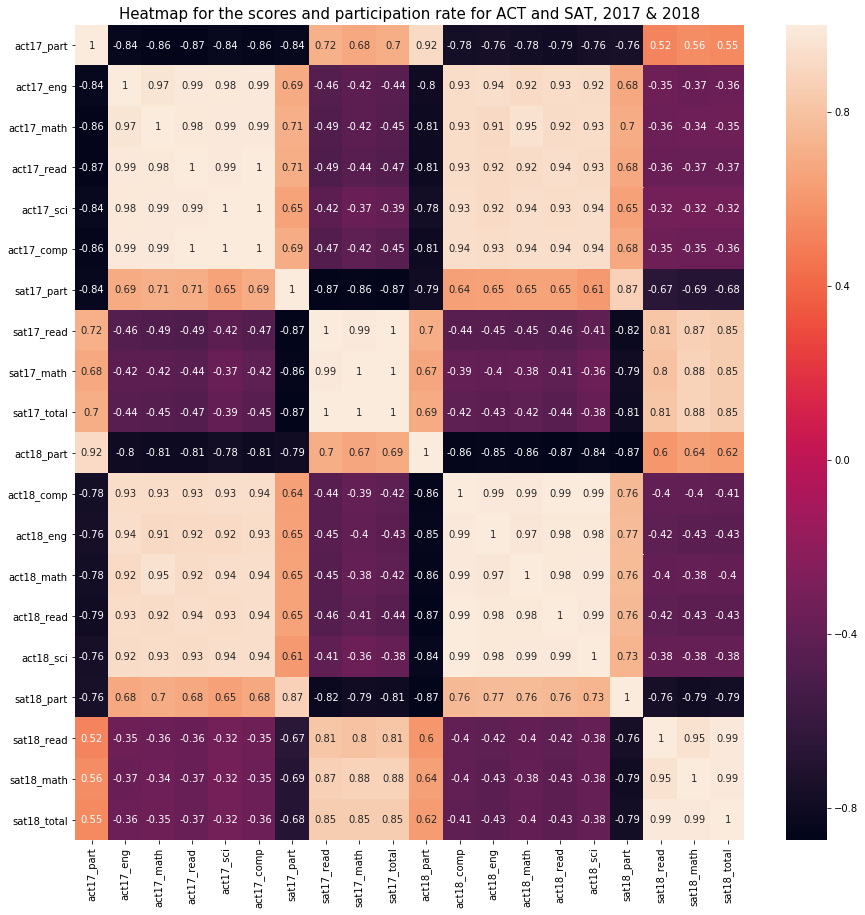

In [43]:
print("The interesting set of correlation shown in this heatmap would be that the two tests have a negative correlation on each other.\
When comparing, for example, SAT participation year on year, its a strong positive correlation. \
But when comparing the same participation rate against the ACT participation rate, there is a strong negative correlation of 0.84\
This effect is even extended when crossing into the scores variable, where ACT scores have arounda -0.4 correlation against the SAT participation rate.")
plt.figure(figsize=(15,15))
test_heatmap=sns.heatmap(scores_1718.corr(),annot=True)
plt.title('Heatmap for the scores and participation rate for ACT and SAT, 2017 & 2018',size = 15)
#plt.savefig('test_heatmap')

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [44]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,title):
    plt.figure(figsize=(16,9))
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,9)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=20,color='teal') 
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(x=np.mean(dataframe[column]),ymin=0,ymax=16,color='r')# feel free to add more settings
        # Set titles, labels, etc here for each subplot
    plt.show()
    fig.savefig('Histogram'+title)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

The participation rates are not normally distributed as most values lie at the extremities and that ACT has a higher overall participation rate.


<Figure size 1152x648 with 0 Axes>

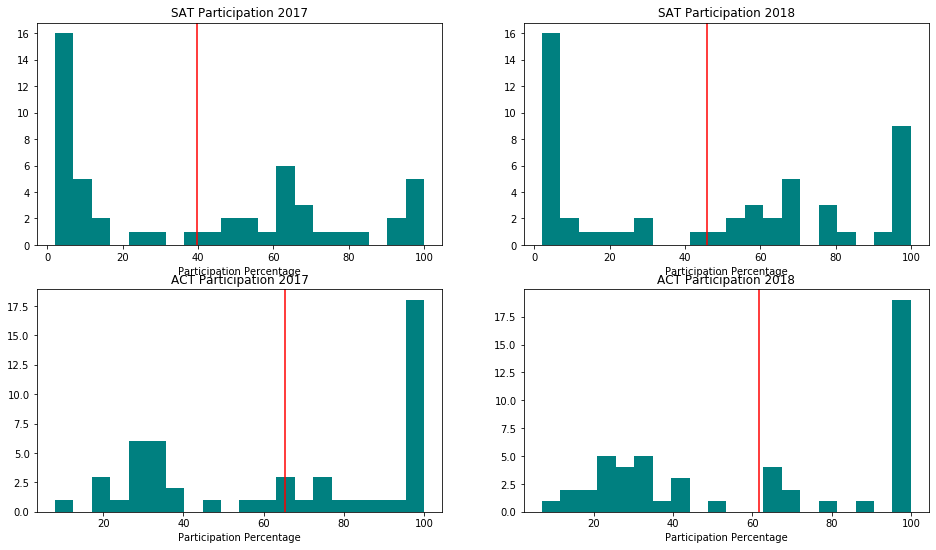

In [45]:
# Code
print('The participation rates are not normally distributed as most values lie at the extremities and that ACT has a higher overall participation rate.')
subplot_histograms(scores_1718,['sat17_part','sat18_part','act17_part','act18_part'],["SAT Participation 2017","SAT Participation 2018","ACT Participation 2017","ACT Participation 2018"],['Participation Percentage','Participation Percentage','Participation Percentage','Participation Percentage'],"Participation")
#plt.savefig('Participation rates histograms')

Twin peaks are evident, which suggest that there are 2 different groups within the population.


<Figure size 1152x648 with 0 Axes>

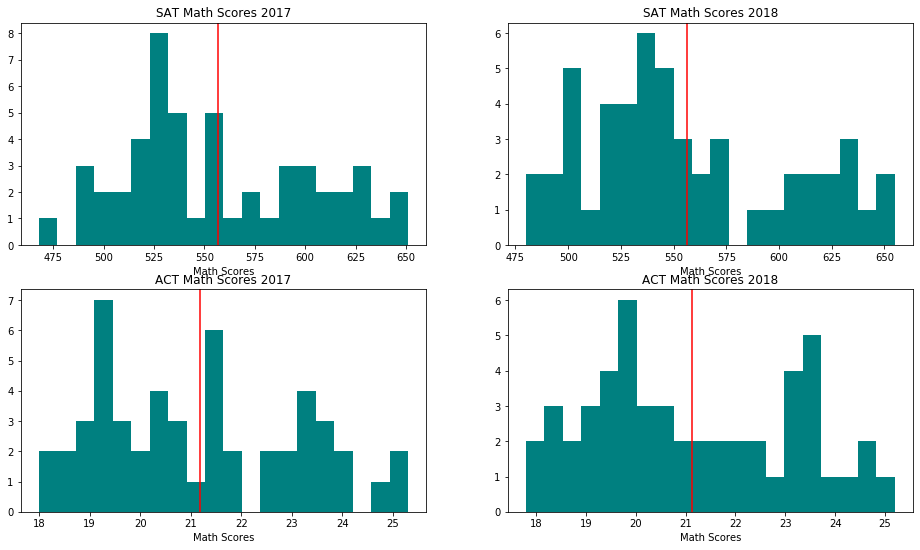

In [46]:
print("Twin peaks are evident, which suggest that there are 2 different groups within the population.")
subplot_histograms(scores_1718,['sat17_math','sat18_math','act17_math','act18_math'],["SAT Math Scores 2017","SAT Math Scores 2018","ACT Math Scores 2017","ACT Math Scores 2018"],['Math Scores','Math Scores','Math Scores','Math Scores'],'math scores')
#plt.savefig('Math scores Histograms')


Multiple peaks are evident in the English scores, which suggests divisions in the population.


<Figure size 1152x648 with 0 Axes>

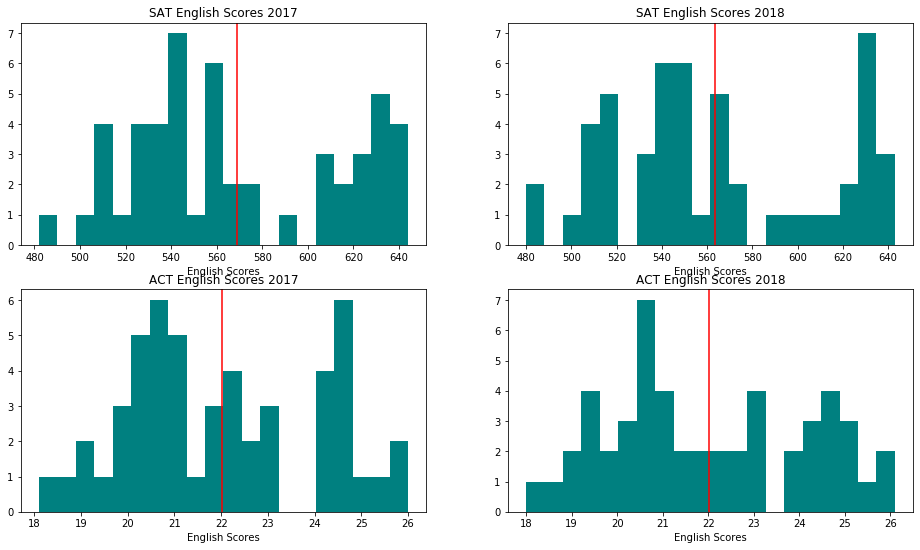

In [47]:
print("Multiple peaks are evident in the English scores, which suggests divisions in the population.")
subplot_histograms(scores_1718,['sat17_read','sat18_read','act17_read','act18_read'],["SAT English Scores 2017","SAT English Scores 2018","ACT English Scores 2017","ACT English Scores 2018"],['English Scores','English Scores','English Scores','English Scores'],"English Scores")
#plt.savefig('English scores histogram')


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


There are many contrasting scores for each state for Math, where most would either have a very high math score in one test and low score in the other, but shows that there is negative correlation between the math score for SAT and ACT.


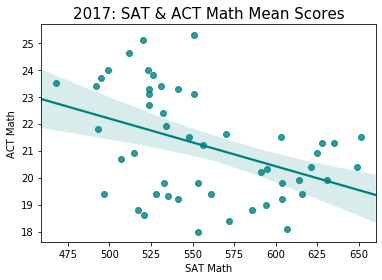

In [48]:
#Code
print('There are many contrasting scores for each state for Math, where most would either have a very high math score in one test and low score in the other, but shows that there is negative correlation between the math score for SAT and ACT.')
sns.regplot(x=scores_1718['sat17_math'],y=scores_1718['act17_math'],color='teal');\
plt.title("2017: SAT & ACT Math Mean Scores",size=15)
plt.xlabel("SAT Math")
plt.ylabel("ACT Math");
#plt.savefig('SAT_ACT Math scores scatter');

The reading and writing scores do exhibit the same high variability as the scores for Math, where most of the scores for ACT and SAT are contrasting.


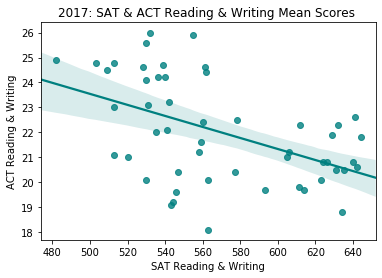

In [49]:
print("The reading and writing scores do exhibit the same high variability as the scores for Math, where most of the scores for ACT and SAT are contrasting.")
sns.regplot(x=scores_1718['sat17_read'],y=scores_1718['act17_read'],color='teal')
plt.title("2017: SAT & ACT Reading & Writing Mean Scores ")
plt.xlabel("SAT Reading & Writing")
plt.ylabel("ACT Reading & Writing");
#plt.savefig('SAT_ACT Read scores scatter');

The same contrasting trend is still exhibited for the total/composite score, where most states are either strong in one test only.


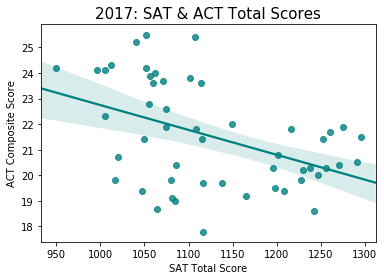

In [50]:
print("The same contrasting trend is still exhibited for the total/composite score, where most states are either strong in one test only.")
sns.regplot(x=scores_1718['sat17_total'],y=scores_1718['act17_comp'],color='teal')
plt.title("2017: SAT & ACT Total Scores",size=15)
plt.xlabel("SAT Total Score")
plt.ylabel("ACT Composite Score");
#plt.savefig('SAT_ACT Total scores scatter');

This plot shows that the most SAT scores for each state is maintained, but there were quite a few outliers that had a massive decrease in mean score from 2017 to 2018.


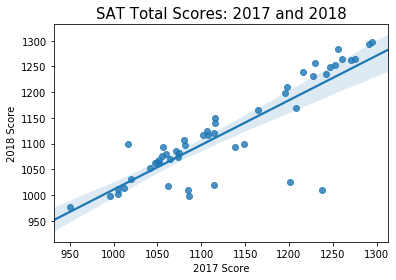

In [51]:
print('This plot shows that the most SAT scores for each state is maintained, but there were quite a few outliers that had a massive decrease in mean score from 2017 to 2018.')
sns.regplot(x=scores_1718['sat17_total'],y=scores_1718['sat18_total'])
plt.title("SAT Total Scores: 2017 and 2018",size=15)
plt.xlabel("2017 Score")
plt.ylabel("2018 Score");
#plt.savefig('SAT scores 2017-2018 scatter');

Most states are able to maintain their ACT composite score from 2017 to 2018, with minimal outliers.


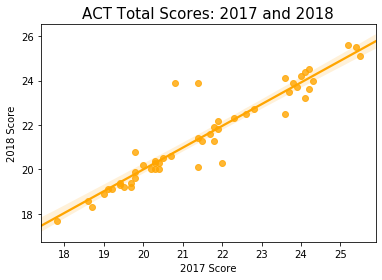

In [52]:
print("Most states are able to maintain their ACT composite score from 2017 to 2018, with minimal outliers.")
sns.regplot(x=scores_1718['act17_comp'],y=scores_1718['act18_comp'],color='orange')
plt.title("ACT Total Scores: 2017 and 2018",size=15)
plt.xlabel("2017 Score")
plt.ylabel("2018 Score");
#plt.savefig('ACT scores 2017-2018 scatter')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [53]:
boxplot_color={"sat17_part":"blue","sat18_part":"blue","act17_part":"orange","act18_part":"orange"}

Clear sign of improvement for SAT average participation rate in 2018, but with a wider interquartile range. This had a minor effect on the ACT participation rate which increased the interquartile range and brought the mean down by just a little. 


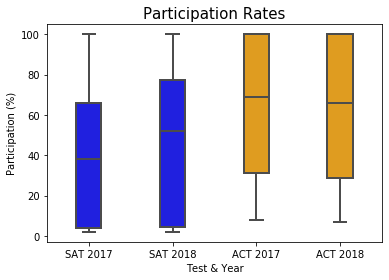

In [54]:
# Code
#participation rate boxplot
print("Clear sign of improvement for SAT average participation rate in 2018, but with a wider interquartile range. This had a minor effect on the ACT participation rate which increased the interquartile range and brought the mean down by just a little. ")
sns.boxplot(data=scores_1718.loc[:,['sat17_part','sat18_part','act17_part','act18_part']],width=0.3,linewidth=2,palette=boxplot_color)
plt.title("Participation Rates",size=15)
plt.xlabel("Test & Year")
plt.xticks([0,1,2,3],['SAT 2017','SAT 2018','ACT 2017','ACT 2018'])
plt.ylabel("Participation (%)");
#plt.savefig('Participation rates boxplot')

SAT total score seems to be constant, the only major difference being an improvement on the lowest outlier.


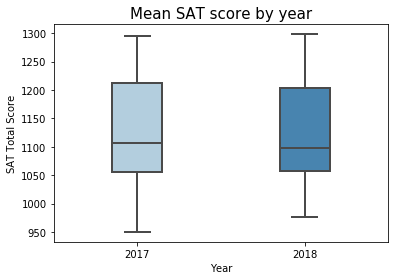

In [55]:
#SAT score boxplot
print('SAT total score seems to be constant, the only major difference being an improvement on the lowest outlier.')
sns.boxplot(data=scores_1718.loc[:,['sat17_total','sat18_total']],width = 0.3, linewidth=2,palette = 'Blues')
plt.title("Mean SAT score by year",size=15)
plt.xticks([0,1],['2017', '2018'])
plt.xlabel('Year')
plt.ylabel("SAT Total Score");
#plt.savefig('sat scores boxplot')

Microscopic changes between the boxplots, difference would be difficult to tell without a table of the actual statistics.
       act17_part  act18_part
count   51.000000   51.000000
mean    65.254902   61.647059
std     32.140842   34.080976
min      8.000000    7.000000
25%     31.000000   28.500000
50%     69.000000   66.000000
75%    100.000000  100.000000
max    100.000000  100.000000


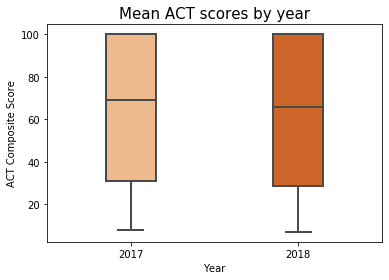

In [56]:
#SAT score boxplot
#act_part=scores_1718.loc[:,['act17_part','act18_part']]
print('Microscopic changes between the boxplots, difference would be difficult to tell without a table of the actual statistics.')
sns.boxplot(data=scores_1718.loc[:,['act17_part','act18_part']], width=0.3,linewidth=2,palette='Oranges')
plt.xticks([0,1],['2017','2018'])
plt.title("Mean ACT scores by year",size=15)
plt.xlabel('Year')
plt.ylabel("ACT Composite Score")
print(scores_1718[['act17_part','act18_part']].describe());
#plt.savefig('act scores boxplot')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [57]:
#code
#Addition of the sat_delta and act_delta columns to part_delta are to show the changes for each test from 2017 to 2018.')
part_delta["sat_delta"]= part_delta.loc[:,'sat18_part']-part_delta.loc[:,'sat17_part']
part_delta["act_delta"]= part_delta.loc[:,'act18_part']-part_delta.loc[:,'act17_part']
part_delta.index=part_delta['state']
part_delta=part_delta.sort_values('sat17_part',ascending=False)
part_delta.head(5)

/Users/dylanteo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dylanteo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,state,sat17_part,sat18_part,act17_part,act18_part,sat_delta,act_delta
state,,,,,,,
District of Columbia,District of Columbia,100,92,32,32,-8,0
Michigan,Michigan,100,100,29,22,0,-7
Connecticut,Connecticut,100,100,31,26,0,-5
Delaware,Delaware,100,100,18,17,0,-1
New Hampshire,New Hampshire,96,96,18,16,0,-2


In [58]:
#creation of the sat_delta and act_delta for score_delta showing the changes in score for 2017 and 2018
score_delta["sat_delta"]= (score_delta.loc[:,'sat18_total']-score_delta.loc[:,'sat17_total'])/score_delta.loc[:,'sat17_total']
score_delta["act_delta"]= (score_delta.loc[:,'act18_comp']-score_delta.loc[:,'act17_comp'])/score_delta.loc[:,'act17_comp']
score_delta.index=score_delta['state']
score_delta=score_delta.sort_values('sat_delta',ascending=False)
score_delta.head(5)

,state,sat17_total,sat18_total,act17_comp,act18_comp,sat_delta,act_delta
state,,,,,,,
Florida,Florida,1017,1099,19.8,19.9,0.080629,0.005051
New Jersey,New Jersey,1056,1094,23.9,23.7,0.035985,-0.008368
Arizona,Arizona,1116,1149,19.7,19.2,0.029570,-0.025381
District of Columbia,District of Columbia,950,977,24.2,23.6,0.028421,-0.024793
Alaska,Alaska,1080,1106,19.8,20.8,0.024074,0.050505


Narrowing down to the states which has the most increased participation in SAT, showing that there is an inverse of the participation rate for ACT and to identify the biggest changers (for those with changes greater than 20%)


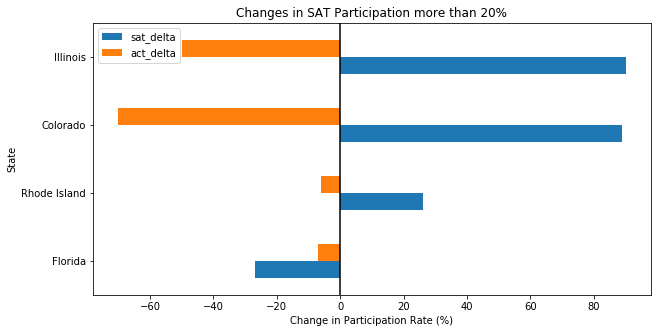

In [59]:
#Comparison between the biggest changes in participation rate for SAT and the effect it has on the corresponding ACT participation rate
print('Narrowing down to the states which has the most increased participation in SAT, showing that there is an inverse of the \
participation rate for ACT and to identify the biggest changers (for those with changes greater than 20%)')
part_delta[((part_delta['sat_delta']>15) |\
(part_delta['sat_delta']<(-15)))][['sat_delta','act_delta']]\
.sort_values(by='sat_delta',ascending=True).plot(kind='barh',figsize=(10,5))
plt.axvline(x=0,color='black')
plt.xlabel('Change in Participation Rate (%)',size=10)
plt.ylabel('State',size=10)
plt.title("Changes in SAT Participation more than 20%");

As shown for the state Florida, a decrease in participation rate increases the overall score for the state, regardless.


/Users/dylanteo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


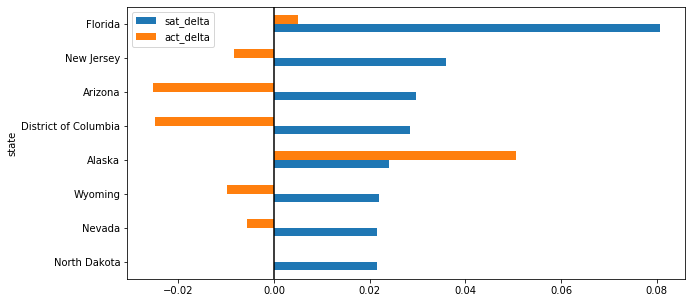

In [60]:
print('As shown for the state Florida, a decrease in participation rate increases the overall score for the state, regardless.')
score_delta[((score_delta['sat_delta']>0.02) |\
(part_delta['sat_delta']<(-0.02)))][['sat_delta','act_delta']]\
.sort_values(by='sat_delta',ascending=True).plot(kind='barh',figsize=(10,5))
plt.axvline(x=0,color='black');

In [61]:
score_delta[((score_delta['sat_delta']>0.08) |\
(score_delta['sat_delta']<(-0.08)))][['sat_delta','act_delta']]

,sat_delta,act_delta
state,,
Florida,0.080629,0.005051
West Virginia,-0.080110,-0.004902
Illinois,-0.086099,0.116822
Colorado,-0.146545,0.149038
Utah,-0.184168,0.004926


The most significant changes in SAT score is the decrease for Utah, Illinois, Colorado and West Virginia. Florida is the only state with a significant increase in SAT score.


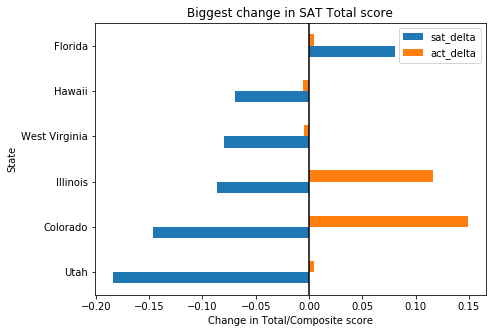

In [62]:
print('The most significant changes in SAT score is the decrease for Utah, Illinois, Colorado and West Virginia. Florida is the only state with a significant increase in SAT score.')
score_delta[((score_delta['sat_delta']>0.05) |\
(score_delta['sat_delta']<(-0.05)))][['sat_delta','act_delta']]\
.sort_values(by='sat_delta',ascending=True).plot(kind='barh',figsize=(7,5))
plt.axvline(x=0,color='black')
plt.xlabel('Change in Total/Composite score',size=10)
plt.ylabel('State',size=10)
plt.title("Biggest change in SAT Total score");

Bar plot to visualise each state's change in total score from 2017 to 2018


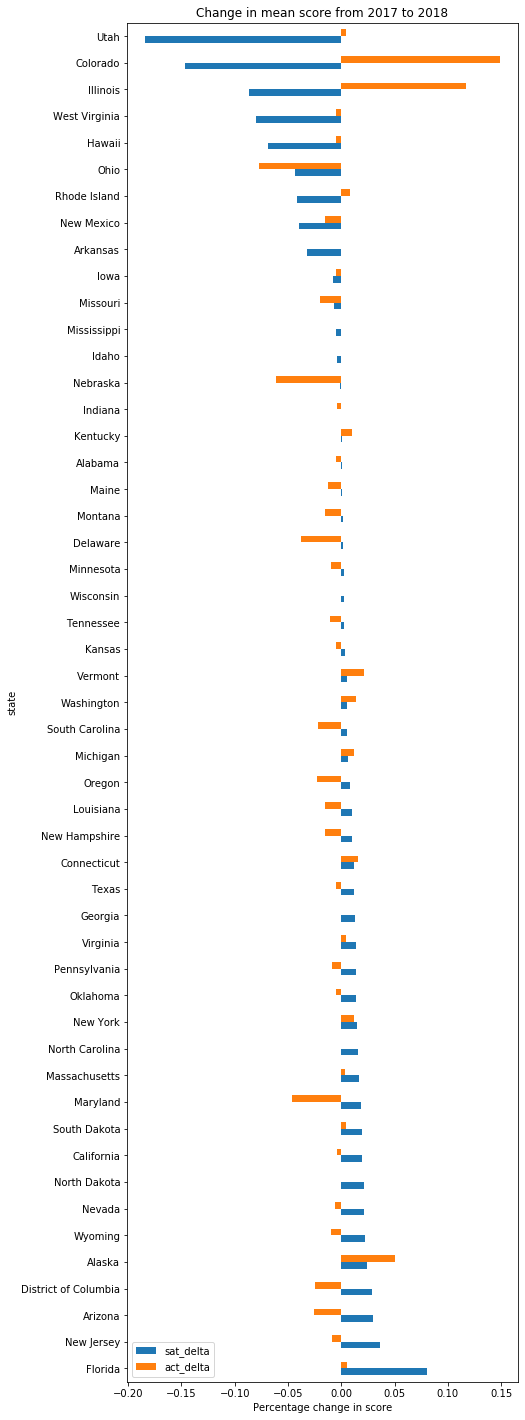

In [63]:
#bar graph of the change in total/composition score from 2017 to 2018 for SAT and ACT.
print('Bar plot to visualise each state\'s change in total score from 2017 to 2018')
score_delta[['sat_delta','act_delta']].sort_values(['sat_delta'],ascending=False).plot(kind='barh',figsize=(7,25))
plt.title('Change in mean score from 2017 to 2018')
plt.xlabel('Percentage change in score');
#plt.savefig('Delta participation rate')

Graph showing the change in each state's participation rate for ACT and SAT, showing some inverse trend between the change in SAT participation compared to ACT participation.


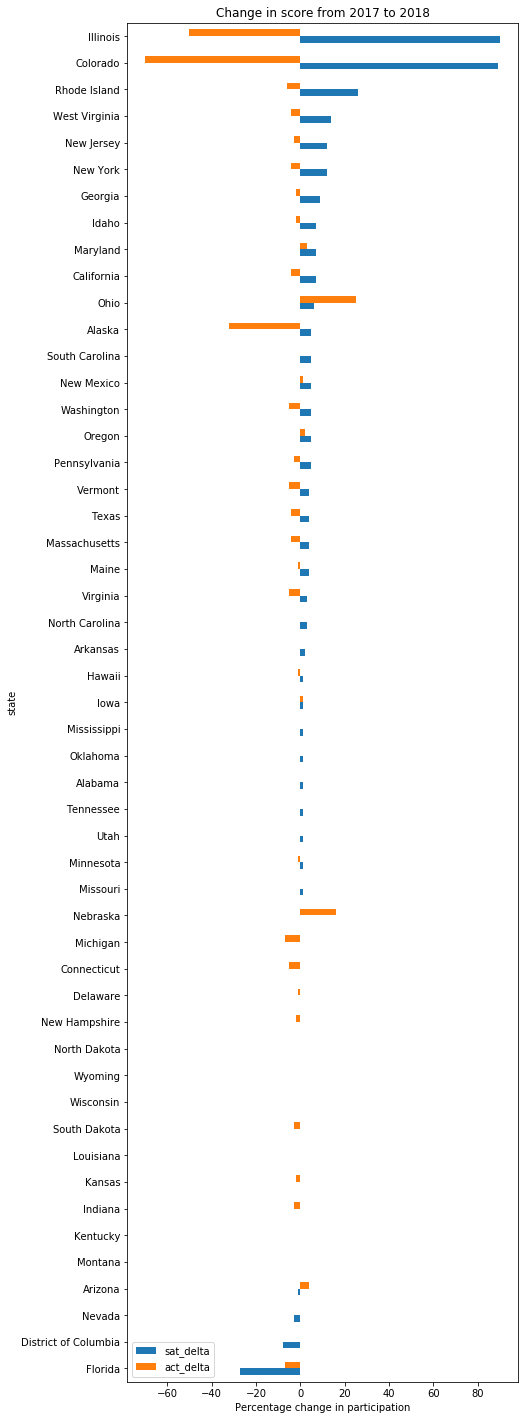

In [64]:
print('Graph showing the change in each state\'s participation rate for ACT and SAT, showing some inverse trend between the change in SAT participation compared to ACT participation.')
part_delta[['sat_delta','act_delta']].sort_values(['sat_delta'],ascending=True).plot(kind='barh',figsize=(7,25))
plt.title('Change in score from 2017 to 2018')
plt.xlabel('Percentage change in participation');
#plt.savefig('Delta scores')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

*Based on the histograms above and below, along with the summary statistics for all the columns, we can tell that there is at least 2 groups of students within the population that participated in either tests. The 'twin peaks' observed in all of the histograms for the scores supports this, where it is clearly evident that there are 2 peaks around the mean, although the peak of both may not be of the same height. The means for all are in the centre of the distribution, which suggest that there is lesser skewness present in the distribution for the scores
As for the population rates, the mean for both are not equal, with SAT having a lower mean (due to the lower overall participation rate compared to ACT). Both exhibit multiple extreme values, having many very high or low participation rates which results in the extremely high standard deviation for both (more than half of the mean value).*

Multiple peaks are observed for total scores for both ACT and SAT. 


<Figure size 1152x648 with 0 Axes>

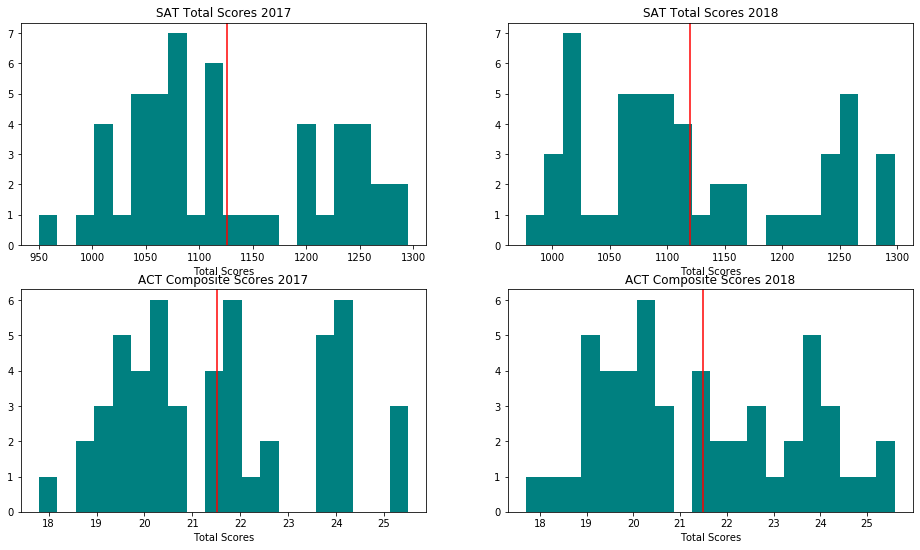

In [65]:
print("Multiple peaks are observed for total scores for both ACT and SAT. ")
subplot_histograms(scores_1718,['sat17_total','sat18_total','act17_comp','act18_comp'],\
                   ["SAT Total Scores 2017","SAT Total Scores 2018","ACT Composite Scores 2017","ACT Composite Scores 2018"],\
                   ['Total Scores','Total Scores','Total Scores','Total Scores'],'Total Scores')
#plt.savefig('Total Scores Histogram')

In [66]:
#for reference without the need to scroll up the notebook.
scores_1718.describe()

,act17_part,act17_eng,act17_math,act17_read,act17_sci,act17_comp,sat17_part,sat17_read,sat17_math,sat17_total,act18_part,act18_comp,act18_eng,act18_math,act18_read,act18_sci,sat18_part,sat18_read,sat18_math,sat18_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


SAT has been having increasing participation rate in 2018, while ACT has decreased. The high max value of 90% participation gain for SAT contrasts that of ACT's max loss of -70% participation rate.


Text(0.5, 1.0, 'Change in Participation rate between ACT and SAT')

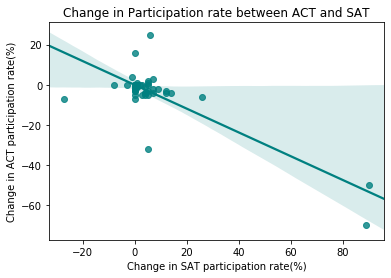

In [67]:
print('SAT has been having increasing participation rate in 2018, while ACT has decreased. The high max value of 90% participation gain for SAT contrasts that of ACT\'s max loss of -70% participation rate.')
part_delta[['sat_delta','act_delta']].describe()
sns.regplot(x=part_delta['sat_delta'],y=part_delta['act_delta'],color='teal')
plt.xlabel('Change in SAT participation rate(%)')
plt.ylabel('Change in ACT participation rate(%)')
plt.title('Change in Participation rate between ACT and SAT')
#plt.savefig('Change in participation scatter')


The scores have been decreasing for both, but with quite a few outliers which increases the variance.


Text(0.5, 1.0, 'Change in overall score between ACT and SAT')

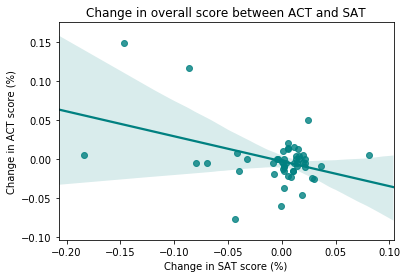

In [68]:
print("The scores have been decreasing for both, but with quite a few outliers which increases the variance.")
score_delta[['sat_delta','act_delta']].describe()
sns.regplot(x=score_delta['sat_delta'],y=score_delta['act_delta'],color='teal')
plt.xlabel('Change in SAT score (%)')
plt.ylabel('Change in ACT score (%)')
plt.title('Change in overall score between ACT and SAT')
#plt.savefig('Change in score Scatter')

Text(0.5, 1.0, 'Participation rates for 2018')

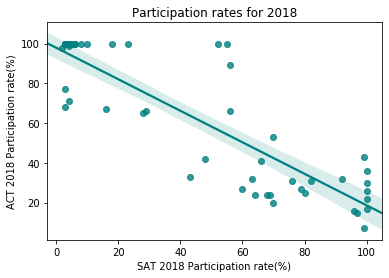

In [69]:
#plotting the 2018 participation rate for both tests
sns.regplot(x=part_delta['sat18_part'],y=part_delta['act18_part'],color='teal')
plt.xlabel('SAT 2018 Participation rate(%)')
plt.ylabel('ACT 2018 Participation rate(%)')
plt.title('Participation rates for 2018')
#plt.savefig('Participation Scatter 2018')

Text(0.5, 1.0, 'Participation rates for 2017')

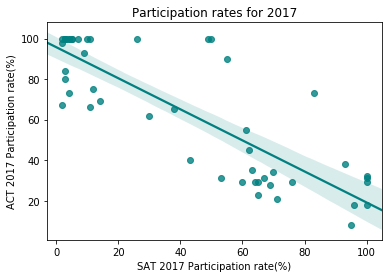

In [70]:
#plotting the 2017 participation rate for both tests
sns.regplot(x=part_delta['sat17_part'],y=part_delta['act17_part'],color='teal')
plt.xlabel('SAT 2017 Participation rate(%)')
plt.ylabel('ACT 2017 Participation rate(%)')
plt.title('Participation rates for 2017')
#plt.savefig('Participation Scatter 2017')

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: 

*This is not observed in the both sets of data from 2017 and 2018, as there seems to be two groups within the population, resulting in 'twin peaks' when plotting the histogram of the data*.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

*For Reading and Math scores, both exhibit twin peaks with scores around the mean of the data as shown in the histogram plots (bimodal or multimodal distributions)*

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: 

*These sets of data will be insufficient for statistical inference, as these data are a group of summary statistics for each particular state and the number of states is not very large.
It does not provide us with the raw data from each student and it provides no information on the non-participating students.
There could be hidden trends or biasedness within each state's scores/rates which would have provided a clearer picture if these data was provided down to each student's individual score.*

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: 

*Based on the scatter plot between each test's score during the same year, it is observed that there seems to be a negative correlation between both SAT and ACT scores, albeit with a very high degree of variability. Based on this, it may be possible to use for analysis but it cannot be used for precise predictive modelling.*

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

*It would not be appropriate as the difference between the participation is significantly different from each other*

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [71]:
part_delta.loc[['Colorado','Illinois','Florida'],['sat_delta','act_delta']]

,sat_delta,act_delta
state,,
Colorado,89,-70
Illinois,90,-50
Florida,-27,-7


Text(0.5, 1.0, 'Change for SAT and ACT participation rate')

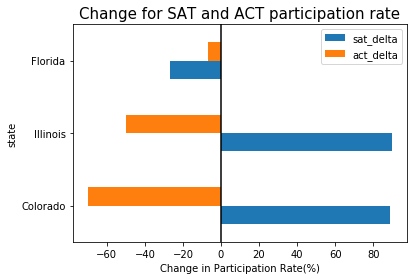

In [72]:
part_delta.loc[['Colorado','Illinois','Florida'],['sat_delta','act_delta']].plot(kind='barh')
plt.axvline(x=0,color="black")
plt.xlabel('Change in Participation Rate(%)')
plt.title('Change for SAT and ACT participation rate',size=15)
#plt.savefig('Major change participation');

Text(0.5, 0, 'Change in mean score (%)')

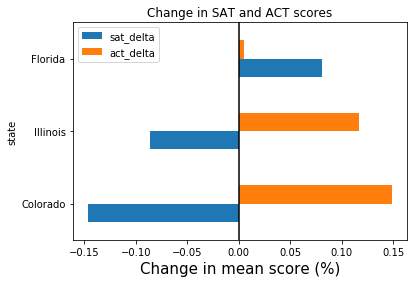

In [73]:
score_delta.loc[['Colorado','Illinois','Florida'],['sat_delta','act_delta']].plot(kind='barh')
plt.axvline(x=0,color="black")
plt.title('Change in SAT and ACT scores')
plt.xlabel('Change in mean score (%)', size=15)
#plt.savefig('Major change score')

*Out of the 50 states, Colorado, Illinois and Florida have the most interesting trends out of all of them, which seems to indicate one trend for the participation rates and another for the test scores.*

*From the graphs above, it is shown that a major **increase** in participation rates for the **SAT** for both the state of Colorado and Illinois coincide with an almost equal major **decrease** in the participation rates for **ACT**. This would suggest that most students in these states are only taking one college entrance test, and not both simultaneously. As per news extracted from the sources below, we can see that Colorado and Illinois has made it compulsory for students to take the SAT, which would explain the overall participation in these states moved from 100% for ACT in 2017 to a 100% for SAT in 2018.*



*Another interesting trend would be that there is another inverse correlation between the mean scores obtained by the state and the participation rate in a certain test. For the previously mentioned states of Colorado and Illinois, when the test that required the full participation had a drastically lower mean score than when it had a low participation the following year. This correlation even extends to the state of Florida, which is one of the few states which had the participation rates for both tests move in the same direction. Both of Florida's mean score increased when the participation rates decreased,  which re-emphasises the inverse correlation. This could be due to the fact that students that the small population that took the test on their own were taking it on their own because they required it and new they would be able to achieve a significant result. If the state were to assist or make it more compulsory, it would introduce the rest of the population which would bring down the mean score.*

*Sources:*

*( Illinois Education Board-https://www.isbe.net/Documents/sy17-assessment-letter-to-districts.pdf)*

*(https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html)*


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [74]:
#filtering for states with low SAT participation scores.
scores_1718[(scores_1718['sat17_part']<10) & (scores_1718['sat18_part']<10)]\
[['state','sat17_part','sat18_part','sat17_total','sat18_total','act17_part','act18_part','act17_comp','act18_comp']]

,state,sat17_part,sat18_part,sat17_total,sat18_total,act17_part,act18_part,act17_comp,act18_comp
0,Alabama,5,6,1165,1166,100,100,19.2,19.1
3,Arkansas,3,5,1208,1169,100,100,19.4,19.4
15,Iowa,2,3,1275,1265,67,68,21.9,21.8
16,Kansas,4,4,1260,1265,73,71,21.7,21.6
17,Kentucky,4,4,1247,1248,100,100,20.0,20.2
18,Louisiana,4,4,1198,1210,100,100,19.5,19.2
23,Minnesota,3,4,1295,1298,100,99,21.5,21.3
24,Mississippi,2,3,1242,1236,100,100,18.6,18.6
25,Missouri,3,4,1271,1262,100,100,20.4,20.0
27,Nebraska,3,3,1253,1252,84,100,21.4,20.1


## <u>TAKEAWAYS</u>

From the data provided, we can infer the following below;

1) Students are most likely to take either the SAT or ACT only.

2) Certain states have implemented compulsory participation in either SAT or ACT. 

3) Students that are more likely to perform well are more likely to take either or both tests on their own accord.

## <u>Recommendations</u>

Based on what was discovered, the recommended action that is supported by the analysis is that to increase the participation rate for SAT across the country,support or adoption by the state's education board would be the best way to increase participation rates (like in Colorado and Illinois). As most states still do not implement a compulsory undertaking of either test, there are still opportunities to convince the state government to impletment some sort of student assistance or to implement it into their school curriculum.

It would be unwise to mention the impact of the scores that the state will be getting upon the implementation, as the increased participation will hurt the average score for the state.

Two states for consideration would be the state of Iowa and Kansas, where the SAT participation has been below 5% for both years and has an incomplete participation in ACT for both years (around 70%). With a high average SAT score (1265) and average ACT score (21.8), it would show that the top scorers for the state do choose to take SAT.



However, in order to gain a more complete picture into the populations of students, we would require information on the individual student level, containing their raw scores obtained for any of the tests that the sat through. Information about the number of non-participating students will also be required as well to measure the participation rate, along with variables like the intention of the student to pursue further studies.


